# Optional Lab - ReLU activation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU). 

$ a = max(0,z) $  # ReLU function

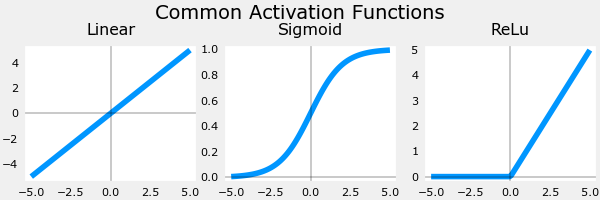

In [2]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.     
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? Let's examine this below. 

### Why Non-Linear Activations?  
<img align="left" src="./images/C2_W2_ReLU_Graph.png"     style=" width:250px; padding: 10px 20px; " > The function shown is composed of linear pieces (piecewise linear). The slope is consistent during the linear portion and then changes abruptly at transition points. At transition points, a new linear function is added which, when added to the existing function, will produce the new slope. The new function is added at transition point but does not contribute to the output prior to that point. The non-linear activation function is responsible for disabling the input prior to and sometimes after the transition points. The following exercise provides a more tangible example.

The exercise will use the network below in a regression problem where you must model a piecewise linear target :
<img align="center" src="./images/C2_W2_ReLU_Network.png"     style=" width:650px; padding: 10px 20px; ">  
The network has 3 units in the first layer. Each is required to form the target. Unit 0 is pre-programmed and fixed to map the first segment. You will modify weights and biases in unit 1 and 2 to model the 2nd and 3rd segment. The output unit is also fixed and simply sums the outputs of the first layer.  

Using the sliders below, modify weights and bias to match the target. 
Hints: Start with `w1` and `b1` and leave `w2` and `b2` zero until you match the 2nd segment. Clicking rather than sliding is quicker.  If you have trouble, don't worry, the text below will describe this in more detail.

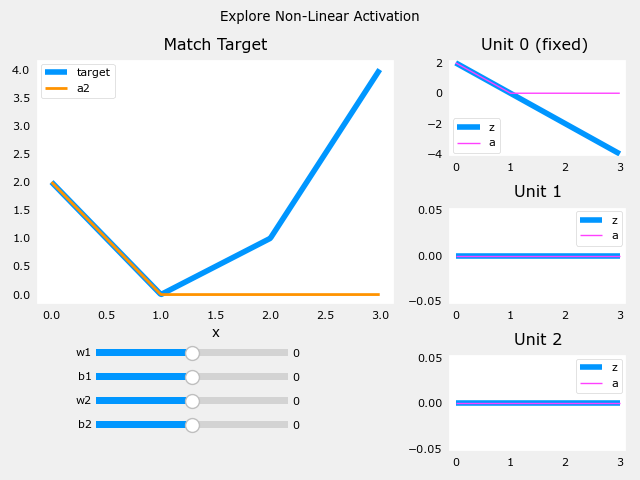

In [3]:
_ = plt_relu_ex()

 
The goal of this exercise is to appreciate how the ReLU's non-linear behavior provides the needed ability to turn functions off until they are needed. Let's see how this worked in this example.
<img align="right" src="./images/C2_W2_ReLU_Plot.png"     style=" width:600px; padding: 10px 20px; "> 
The plots on the right contain the output of the units in the first layer.   
Starting at the top, unit 0 is responsible for the first segment marked with a 1. Both the linear function $z$ and the function following the ReLU $a$ are shown. You can see that the ReLU cuts off the function after the interval [0,1]. This is important as it prevents Unit 0 from interfering with the following segment. 

Unit 1 is responsible for the 2nd segment. Here the ReLU kept this unit quiet until after x is 1. Since the first unit is not contributing, the slope for unit 1, $w^{[1]}_1$, is just the slope of the target line. The bias must be adjusted to keep the output negative until x has reached 1. Note how the contribution of Unit 1 extends to the 3rd segment as well.

Unit 2 is responsible for the 3rd segment. The ReLU again zeros the output until x reaches the right value.The slope of the unit, $w^{[1]}_2$, must be set so that the sum of unit 1 and 2 have the desired slope. The bias is again adjusted to keep the output negative until x has reached 2. 

The "off" or disable feature  of the ReLU activation enables models to stitch together linear segments to model complex non-linear functions.


## Congratulations!
You are now more familiar with the ReLU and the importance of its non-linear behavior.

# Optional Lab - Softmax Function
In this lab, we will explore the softmax function. This function is used in both Softmax Regression and in Neural Networks when solving Multiclass Classification problems.  

<center>  <img  src="./images/C2_W2_Softmax_Header.PNG" width="600" />  <center/>

  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

> **Note**: Normally, in this course, the notebooks use the convention of starting counts with 0 and ending with N-1,  $\sum_{i=0}^{N-1}$, while lectures start with 1 and end with N,  $\sum_{i=1}^{N}$. This is because code will typically start iteration with 0 while in lecture, counting 1 to N leads to cleaner, more succinct equations. This notebook has more equations than is typical for a lab and thus  will break with the convention and will count 1 to N.

## Softmax Function
In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.
<center>  <img  src="./images/C2_W2_SoftmaxReg_NN.png" width="600" />  

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}


Which shows the output is a vector of probabilities. The first entry is the probability the input is the first category given the input $\mathbf{x}$ and parameters $\mathbf{w}$ and $\mathbf{b}$.  
Let's create a NumPy implementation:

In [5]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

Below, vary the values of the `z` inputs using the sliders.

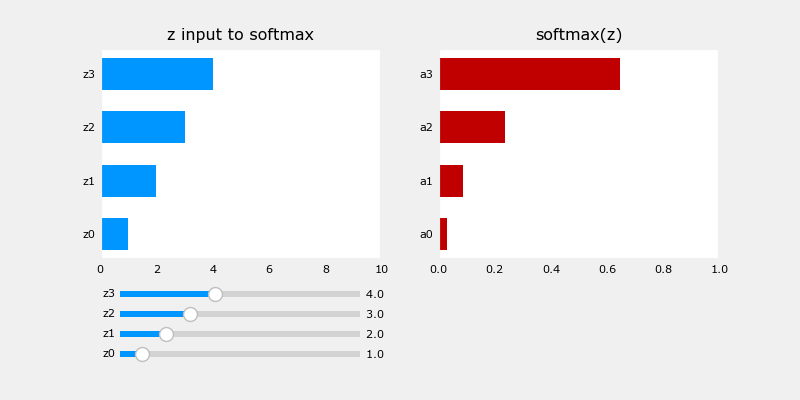

In [6]:
plt.close("all")
plt_softmax(my_softmax)

As you are varying the values of the z's above, there are a few things to note:
* the exponential in the numerator of the softmax magnifies small differences in the values 
* the output values sum to one
* the softmax spans all of the outputs. A change in `z0` for example will change the values of `a0`-`a3`. Compare this to other activations such as ReLU or Sigmoid which have a single input and single output.

## Cost
<center> <img  src="./images/C2_W2_SoftMaxCost.png" width="400" />    <center/>

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


## Tensorflow
This lab will discuss two ways of implementing the softmax, cross-entropy loss in Tensorflow, the 'obvious' method and the 'preferred' method. The former is the most straightforward while the latter is more numerically stable.

Let's start by creating a dataset to train a multiclass classification model.

In [7]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [8]:
X_train.shape, y_train.shape

((2000, 2), (2000,))

### The *Obvious* organization

The model below is implemented with the softmax as an activation in the final Dense layer.
The loss function is separately specified in the `compile` directive. 

The loss function is `SparseCategoricalCrossentropy`. This loss is described in (3) above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities. 

In [9]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.2788 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.5686
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.2025
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.1087
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.0774
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.0629
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.0612
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.0549
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.0567
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.0444


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [10]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
[[3.85e-03 1.18e-03 9.65e-01 2.96e-02]
 [9.94e-01 6.11e-03 2.33e-05 1.45e-05]]
largest value 0.9999969 smallest value 2.0329922e-09


### Preferred <img align="Right" src="./images/C2_W2_softmax_accurate.png"  style=" width:400px; padding: 10px 20px ; ">
Recall from lecture, more stable and accurate results can be obtained if the softmax and loss are combined during training.   This is enabled by the 'preferred' organization shown here.


In the preferred organization the final layer has a linear activation. For historical reasons, the outputs in this form are referred to as *logits*. The loss function has an additional argument: `from_logits = True`. This informs the loss function that the softmax operation should be included in the loss calculation. This allows for an optimized implementation.

In [11]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.9011 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.3134
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.1494
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.0879
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.0740
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.0535
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.0502
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.0544
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.0446
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.0436


#### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 
Let's look at the preferred model outputs:

In [12]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
two example output vectors:
 [[-1.95e+00 -4.06e-01  4.96e+00  5.64e-01]
 [ 1.09e+01  5.88e+00  1.03e-02 -4.07e+00]]
largest value 18.860348 smallest value -12.638695


The output predictions are not probabilities!
If the desired output are probabilities, the output should be be processed by a [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax).

In [13]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[9.79e-04 4.59e-03 9.82e-01 1.21e-02]
 [9.94e-01 6.46e-03 1.83e-05 3.10e-07]]
largest value 0.9999993 smallest value 5.192798e-13


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [14]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-1.95 -0.41  4.96  0.56], category: 2
[ 1.09e+01  5.88e+00  1.03e-02 -4.07e+00], category: 0
[ 8.12  4.95  0.1  -3.04], category: 0
[0.28 5.52 0.22 0.19], category: 1
[ 1.61 -1.72  7.26 -4.88], category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].


## Congratulations!
In this lab you 
- Became more familiar with the softmax function and its use in softmax regression and in softmax activations in neural networks. 
- Learned the preferred model construction in Tensorflow:
    - No activation on the final layer (same as linear activation)
    - SparseCategoricalCrossentropy loss function
    - use from_logits=True
- Recognized that unlike ReLU and Sigmoid, the softmax spans multiple outputs.

# Optional Lab - Multi-class Classification


## 1.1 Goals
In this lab, you will explore an example of multi-class classification using neural networks.
<figure>
 <img src="./images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


## 1.2 Tools
You will use some plotting routines. These are stored in `lab_utils_multiclass_TF.py` in this directory.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Multi-class Classification
Neural Networks are often used to classify data. Examples are neural networks:
- take in photos and classify subjects in the photos as {dog,cat,horse,other}
- take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}  

A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category. 

In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set.

## 2.1 Prepare and visualize our data
We will use Scikit-Learn `make_blobs` function to make a training data set with 4 categories as shown in the plot below.

In [16]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

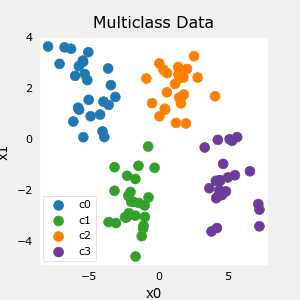

In [17]:
plt_mc(X_train,y_train,classes, centers, std=std)

Each dot represents a training example. The axis (x0,x1) are the inputs and the color represents the class the example is associated with. Once trained, the model will be presented with a new example, (x0,x1), and will predict the class.  

While generated, this data set is representative of many real-world classification problems. There are several input features (x0,...,xn) and several output categories. The model is trained to use the input features to predict the correct output category.

In [18]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## 2.2 Model
<img align="Right" src="./images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
This lab will use a 2-layer network as shown.
Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.   

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a `linear` rather than a `softmax` activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [19]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

The statements below compile and train the network. Setting `from_logits=True` as an argument to the loss function specifies that the output activation was linear rather than a softmax.

In [20]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9834  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.9232
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.8752
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.8329
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.7952
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.7613
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.7311
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.7041
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.6798
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.6581
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 0.6386
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.6213
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.6055
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.5909
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5773
Epoch 

With the model trained, we can see how the model has classified the training data.

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step


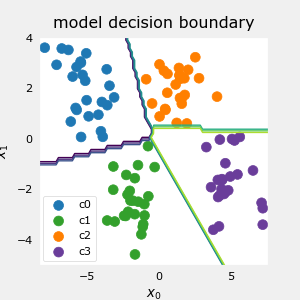

In [21]:
plt_cat_mc(X_train, y_train, model, classes)

Above, the decision boundaries show how the model has partitioned the input space.  This very simple model has had no trouble classifying the training data. How did it accomplish this? Let's look at the network in more detail. 

Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed explanation of the results. You don't need to know these details to successfully use neural networks, but it may be helpful to gain more intuition about how the layers combine to solve a classification problem.

In [22]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

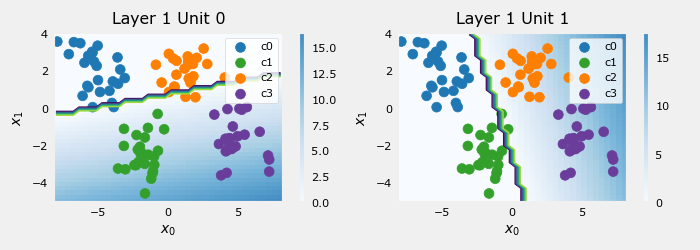

In [23]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

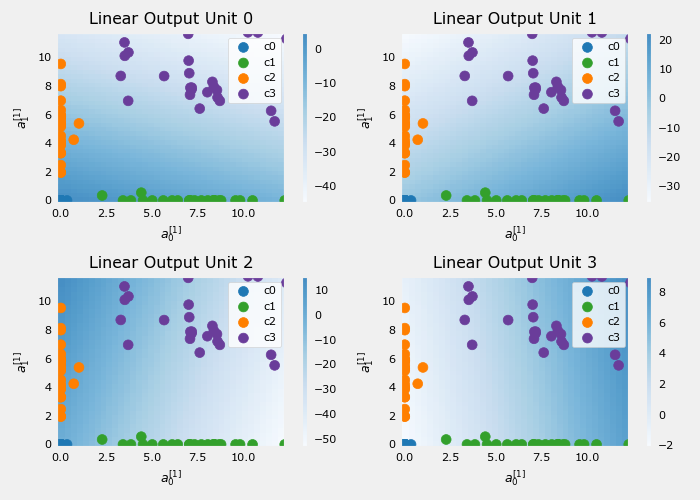

In [24]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explanation
#### Layer 1 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ($x_0,x_1$) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. 
The contour lines in this graph show the transition point between the output, $a^{[1]}_j$ being zero and non-zero. Recall the graph for a ReLu :<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.  
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!

#### Layer 2, the output layer  <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer $a^{[1]}_0$ and $a^{[1]}_1$. As predicted above, classes 0 and 1 (blue and green) have  $a^{[1]}_0 = 0$ while classes 0 and 2 (blue and orange) have $a^{[1]}_1 = 0$.  
Once again, the intensity of the background color indicates the highest values.  
Unit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.    
Unit 1 produces its highest values in the upper left corner selecting class 1 (green).  
Unit 2 targets the lower right corner where class 2 (orange) resides.  
Unit 3 produces its highest values in the upper right selecting our final class (purple).  

One other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not sufficient for a unit to produce a maximum value for the class it is selecting for, it must also be the highest value of all the units for points in that class. This is done by the implied softmax function that is part of the loss function (`SparseCategoricalCrossEntropy`). Unlike other activation functions, the softmax works across all the outputs.

You can successfully use neural networks without knowing the details of what each unit is up to. Hopefully, this example has provided some intuition about what is happening under the hood.

## Congratulations!
You have learned to build and operate a neural network for multiclass classification.


# Optional Lab - Derivatives
This lab will give you a more intuitive understanding of derivatives. It will show you a simple way of calculating derivatives arithmetically. It will also introduce you to a handy Python library that allows you to calculate derivatives symbolically.

In [25]:
from sympy import symbols, diff

## Informal definition of derivatives

The formal definition of derivatives can be a bit daunting with limits and values 'going to zero'. The idea is really much simpler. 

The derivative of a function describes how the output of a function changes when there is a small change in an input variable.

Let's use the cost function $J(w)$ as an example. The cost $J$ is the output and $w$ is the input variable.  
Let's give a 'small change' a name *epsilon* or $\epsilon$. We use these Greek letters because it is traditional in mathematics to use *epsilon*($\epsilon$) or *delta* ($\Delta$) to represent a small value. You can think of it as representing 0.001 or some other small value.  

$$
\begin{equation}
\text{if } w \uparrow \epsilon \text{ causes }J(w) \uparrow \text{by }k \times \epsilon \text{ then}  \\
\frac{\partial J(w)}{\partial w} = k \tag{1}
\end{equation}
$$

This just says if you change the input to the function $J(w)$ by a little bit and the output changes by $k$ times that little bit, then the derivative of $J(w)$ is equal to $k$.

Let's try this out.  Let's look at the derivative of the function $J(w) = w^2$ at the point $w=3$ and $\epsilon = 0.001$

In [26]:
J = (3)**2
J_epsilon = (3 + 0.001)**2
k = (J_epsilon - J)/0.001    # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k:0.6f} ")

J = 9, J_epsilon = 9.006001, dJ_dw ~= k = 6.001000 


We have increased the input value a little bit (0.001), causing the output to change from 9 to 9.006001, an increase of 6 times the input increase. Referencing (1) above, this says that $k=6$, so $\frac{\partial J(w)}{\partial w} \approx 6$. If you are familiar with calculus, you know, written symbolically,  $\frac{\partial J(w)}{\partial w} = 2 w$. With $w=3$ this is 6. Our calculation above is not exactly 6 because to be exactly correct $\epsilon$ would need to be [infinitesimally small](https://www.dictionary.com/browse/infinitesimally) or really, really small. That is why we use the symbols $\approx$ or ~= rather than =. Let's see what happens if we make $\epsilon$ smaller.

In [27]:
J = (3)**2
J_epsilon = (3 + 0.000000001)**2
k = (J_epsilon - J)/0.000000001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 9, J_epsilon = 9.000000006, dJ_dw ~= k = 6.000000496442226 


The value gets close to exactly 6 as we reduce the size of $\epsilon$. Feel free to try reducing the value further.

## Finding symbolic derivatives
In backprop it is useful to know the derivative of simple functions at any input value. Put another way, we would like to know the 'symbolic' derivative rather than the 'arithmetic' derivative. An example of a symbolic derivative is,  $\frac{\partial J(w)}{\partial w} = 2 w$, the derivative of $J(w) = w^2$ above.  With the symbolic derivative you can find the value of the derivative at any input value $w$.  

If you have taken a calculus course, you are familiar with the many [differentiation rules](https://en.wikipedia.org/wiki/Differentiation_rules#Power_laws,_polynomials,_quotients,_and_reciprocals) that mathematicians have developed to solve for a derivative given an expression. Well, it turns out this process has been automated with symbolic differentiation programs. An example of this in python is the [SymPy](https://www.sympy.org/en/index.html) library. Let's take a look at how to use this.

### $J = w^2$
Define the python variables and their symbolic names.

In [28]:
J, w = symbols('J, w')

Define and print the expression. Note SymPy produces a [latex](https://en.wikibooks.org/wiki/LaTeX/Mathematics) string which generates a nicely readable equation.

In [29]:
J=w**2
J

w**2

Use SymPy's `diff` to differentiate the expression for $J$ with respect to $w$. Note the result matches our earlier example.

In [30]:
dJ_dw = diff(J,w)
dJ_dw

2*w

Evaluate the derivative at a few points by 'substituting' numeric values for the symbolic values. In the first example, $w$ is replaced by $2$.

In [31]:
dJ_dw.subs([(w,2)])    # derivative at the point w = 2

4

In [32]:
dJ_dw.subs([(w,3)])    # derivative at the point w = 3

6

In [33]:
dJ_dw.subs([(w,-3)])    # derivative at the point w = -3

-6

## $J = 2w$

In [34]:
w, J = symbols('w, J')

In [35]:
J = 2 * w
J

2*w

In [36]:
dJ_dw = diff(J,w)
dJ_dw

2

In [37]:
dJ_dw.subs([(w,-3)])    # derivative at the point w = -3

2

Compare this with the arithmetic calculation

In [38]:
J = 2*3
J_epsilon = 2*(3 + 0.001)
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 6, J_epsilon = 6.002, dJ_dw ~= k = 1.9999999999997797 


For the function $J=2w$, it is easy to see that any change in $w$ will result in 2 times that amount of change in the output $J$, regardless of the starting value of $w$. Our NumPy and arithmetic results confirm this. 

## $J = w^3$

In [39]:
J, w = symbols('J, w')

In [40]:
J=w**3
J

w**3

In [41]:
dJ_dw = diff(J,w)
dJ_dw

3*w**2

In [42]:
dJ_dw.subs([(w,2)])   # derivative at the point w=2

12

Compare this with the arithmetic calculation

In [43]:
J = (2)**3
J_epsilon = (2+0.001)**3
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 8, J_epsilon = 8.012006000999998, dJ_dw ~= k = 12.006000999997823 


## $J = \frac{1}{w}$

In [44]:
J, w = symbols('J, w')

In [45]:
J= 1/w
J

1/w

In [46]:
dJ_dw = diff(J,w)
dJ_dw

-1/w**2

In [47]:
dJ_dw.subs([(w,2)])

-1/4

Compare this with the arithmetic calculation

In [48]:
J = 1/2
J_epsilon = 1/(2+0.001)
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 0.5, J_epsilon = 0.49975012493753124, dJ_dw ~= k = -0.2498750624687629 


## $J = \frac{1}{w^2}$

In [49]:
J, w = symbols('J, w')

If you have time, try to repeat the above steps on the function  $J = \frac{1}{w^2}$ and evaluate at w=4

In [50]:
J = 1/w**2
J

w**(-2)

In [51]:
dJ_dw = diff(J,w)
dJ_dw

-2/w**3

In [52]:
J = 1/(2**2)
J_epsilon = 1/((2+0.001)**2)
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 0.25, J_epsilon = 0.2497501873750781, dJ_dw ~= k = -0.24981262492190792 


Compare this with the arithmetic calculation

In [53]:
J = 1/4**2
J_epsilon = 1/(4+0.001)**2
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 0.0625, J_epsilon = 0.06246876171484496, dJ_dw ~= k = -0.031238285155041345 


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python 
J= 1/w**2
dJ_dw = diff(J,w)
dJ_dw.subs([(w,4)])
```
  

</details>

    


## Congratulations!
If you have run through the above examples, you understand a derivative describes the change in the output of a function that is a result of a small change in an input to that function. You also can use *SymPy* in python to find the symbolic derivative of functions.

# Optional Lab: Back propagation using a computation graph
Working through this lab will give you insight into a key algorithm used by most machine learning frameworks. Gradient descent requires the derivative of the cost with respect to each parameter in the network.  Neural networks can have millions or even billions of parameters. The *back propagation* algorithm is used to compute those derivatives. *Computation graphs* are used to simplify the operation. Let's dig into this below.

In [54]:
from sympy import *
import numpy as np
import re
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
from matplotlib.widgets import Button
import ipywidgets as widgets
from lab_utils_backprop import *

## Computation Graph
A computation graph simplifies the computation of complex derivatives by breaking them into smaller steps. Let's see how this works.

Let's calculate the derivative of this slightly complex expression, $J = (2+3w)^2$. We would like to find the derivative of $J$ with respect to $w$ or $\frac{\partial J}{\partial w}$.

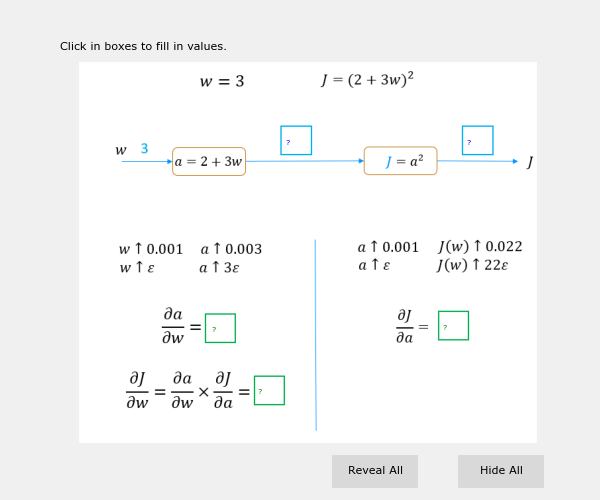

In [55]:
plt.close("all")
plt_network(config_nw0, "./images/C2_W2_BP_network0.PNG")

Above, you can see we broke the expression into two nodes which we can work on independently. If you already have a good understanding of the process from the lecture, you can go ahead and fill in the boxes in the diagram above. You will want to first fill in the blue boxes going left to right and then fill in the green boxes starting on the right and moving to the left.
If you have the correct values, the values will show as green or blue. If the value is incorrect, it will be red. Note, the interactive graphic is not particularly robust. If you run into trouble with the interface, run the cell above again to restart.

If you are unsure of the process, we will work this example step by step below.

### Forward Propagation   
Let's calculate the values in the forward direction.

>Just a note about this section. It uses global variables and reuses them as the calculation progresses. If you run cells out of order, you may get funny results. If you do, go back to this point and run them in order.

In [56]:
w = 3
a = 2+3*w
J = a**2
print(f"a = {a}, J = {J}")

a = 11, J = 121


You can fill these values in the blue boxes above.

### Backprop
<img align="left" src="./images/C2_W2_BP_network0_j.PNG"     style=" width:100px; padding: 10px 20px; " > Backprop is the algorithm we use to calculate derivatives. As described in the lectures, backprop starts at the right and moves to the left. The first node to consider is $J = a^2 $ and the first step is to find $\frac{\partial J}{\partial a}$ 


### $\frac{\partial J}{\partial a}$ 
#### Arithmetically
Find $\frac{\partial J}{\partial a}$ by finding how $J$ changes as a result of a little change in $a$. This is described in detail in the derivatives optional lab.

In [57]:
a_epsilon = a + 0.001       # a epsilon
J_epsilon = a_epsilon**2    # J_epsilon
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_da ~= k = {k} ")

J = 121, J_epsilon = 121.02200099999999, dJ_da ~= k = 22.000999999988835 


$\frac{\partial J}{\partial a}$ is 22 which is $2\times a$. Our result is not exactly $2 \times a$ because our epsilon value is not infinitesimally small. 
#### Symbolically
Now, let's use SymPy to calculate derivatives symbolically as we did in the derivatives optional lab. We will prefix the name of the variable with an 's' to indicate this is a *symbolic* variable.

In [58]:
sw,sJ,sa = symbols('w,J,a')
sJ = sa**2
sJ

a**2

In [59]:
sJ.subs([(sa,a)])

121

In [60]:
dJ_da = diff(sJ, sa)
dJ_da

2*a

So, $\frac{\partial J}{\partial a} = 2a$. When $a=11$, $\frac{\partial J}{\partial a} = 22$. This matches our arithmetic calculation above.
If you have not already done so, you can go back to the diagram above and fill in the value for $\frac{\partial J}{\partial a}$.

### $\frac{\partial J}{\partial w}$ 
<img align="left" src="./images/C2_W2_BP_network0_a.PNG"     style=" width:100px; padding: 10px 20px; " >  Moving from right to left, the next value we would like to compute is $\frac{\partial J}{\partial w}$. To do this, we first need to calculate $\frac{\partial a}{\partial w}$ which describes how the output of this node, $a$, changes when the input $w$ changes a little bit.

#### Arithmetically
Find $\frac{\partial a}{\partial w}$ by finding how $a$ changes as a result of a little change in $w$.

In [61]:
w_epsilon = w + 0.001       # a  plus a small value, epsilon
a_epsilon = 2 + 3*w_epsilon

k = (a_epsilon - a)/0.001   # difference divided by epsilon
print(f"a = {a}, a_epsilon = {a_epsilon}, da_dw ~= k = {k} ")

a = 11, a_epsilon = 11.003, da_dw ~= k = 3.0000000000001137 


Calculated arithmetically,  $\frac{\partial a}{\partial w} \approx 3$. Let's try it with SymPy.

In [62]:
sa = 2 + 3*sw
sa

3*w + 2

In [63]:
da_dw = diff(sa,sw)
da_dw

3

>The next step is the interesting part:
> - We know that a small change in $w$ will cause $a$ to change by 3 times that amount.
> - We know that a small change in $a$ will cause $J$ to change by $2\times a$ times that amount. (a=11 in this example)    
 so, putting these together, 
> - We  know that a small change in $w$ will cause $J$ to change by $3 \times 2\times a$ times that amount.
> 
> These cascading changes go by the name of *the chain rule*.  It can be written like this: 
 $$\frac{\partial J}{\partial w} = \frac{\partial a}{\partial w} \frac{\partial J}{\partial a} $$
 
It's worth spending some time thinking this through if it is not clear. This is a key take-away.
 
 Let's try calculating it:
 

In [64]:
dJ_dw = da_dw * dJ_da
dJ_dw

6*a

And $a$ is 11 in this example so $\frac{\partial J}{\partial w} = 66$. We can check this arithmetically:

In [65]:
w_epsilon = w + 0.001
a_epsilon = 2 + 3*w_epsilon
J_epsilon = a_epsilon**2
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 121, J_epsilon = 121.06600900000001, dJ_dw ~= k = 66.0090000000082 


OK! You can now fill the values for  $\frac{\partial a}{\partial w}$ and $\frac{\partial J}{\partial w}$ in  the diagram if you have not already done so. 

**Another view**  
One could visualize these cascading changes this way:  
<img align="center" src="./images/C2_W2_BP_network0_diff.PNG"  style=" width:500px; padding: 10px 20px; " >  
A small change in $w$ is multiplied by $\frac{\partial a}{\partial w}$ resulting in a change that is 3 times as large. This larger change is then multiplied by $\frac{\partial J}{\partial a}$ resulting in a change that is now $3 \times 22 = 66$ times larger.

## Computation Graph of a Simple Neural Network
Below is a graph of the neural network used in the lecture with different values. Try and fill in the values in the boxes. Note, the interactive graphic is not particularly robust. If you run into trouble with the interface, run the cell below again to restart.

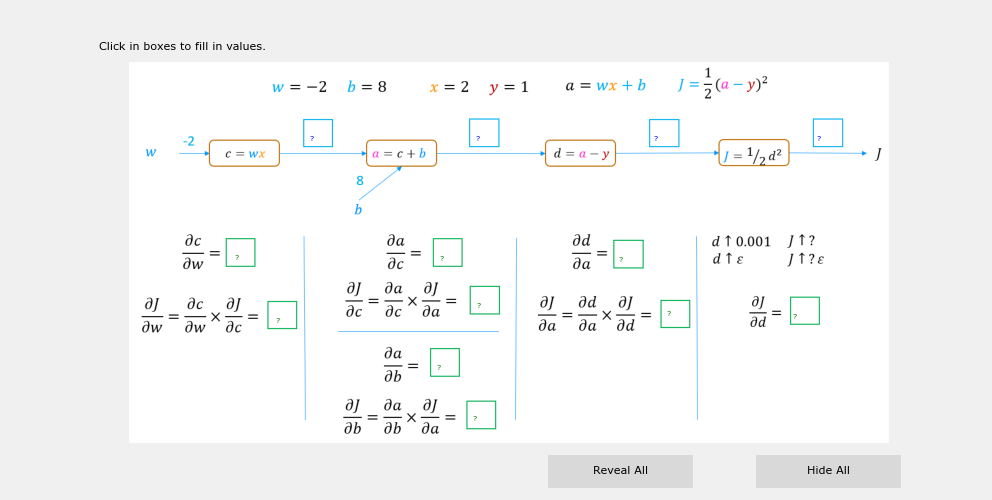

In [66]:
plt.close("all")
plt_network(config_nw1, "./images/C2_W2_BP_network1.PNG")

Below, we will go through the computations required to fill in the above computation graph in detail. We start with the forward path.

### Forward propagation
The calculations in the forward path are the ones you have recently learned for neural networks. You can compare the values below to those you calculated for the diagram above.

In [67]:
# Inputs and parameters
x = 2
w = -2
b = 8
y = 1
# calculate per step values   
c = w * x
a = c + b
d = a - y
J = d**2/2
print(f"J={J}, d={d}, a={a}, c={c}")

J=4.5, d=3, a=4, c=-4


### Backward propagation (Backprop)
<img align="left" src="./images/C2_W2_BP_network1_jdsq.PNG"     style=" width:100px; padding: 10px 20px; " > As described in the lectures, backprop starts at the right and moves to the left. The first node to consider is $J = \frac{1}{2}d^2 $ and the first step is to find $\frac{\partial J}{\partial d}$ 


### $\frac{\partial J}{\partial d}$ 

#### Arithmetically
Find $\frac{\partial J}{\partial d}$ by finding how $J$ changes as a result of a little change in $d$.

In [68]:
d_epsilon = d + 0.001
J_epsilon = d_epsilon**2/2
k = (J_epsilon - J)/0.001   # difference divided by epsilon
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dd ~= k = {k} ")

J = 4.5, J_epsilon = 4.5030005, dJ_dd ~= k = 3.0004999999997395 


$\frac{\partial J}{\partial d}$ is 3, which is the value of $d$. Our result is not exactly $d$ because our epsilon value is not infinitesimally small. 
#### Symbolically
Now, let's use SymPy to calculate derivatives symbolically, as we did in the derivatives optional lab. We will prefix the name of the variable with an 's' to indicate this is a *symbolic* variable.

In [69]:
sx,sw,sb,sy,sJ = symbols('x,w,b,y,J')
sa, sc, sd = symbols('a,c,d')
sJ = sd**2/2
sJ

d**2/2

In [70]:
sJ.subs([(sd,d)])

9/2

In [71]:
dJ_dd = diff(sJ, sd)
dJ_dd

d

So, $\frac{\partial J}{\partial d}$ = d. When $d=3$, $\frac{\partial J}{\partial d}$ = 3. This matches our arithmetic calculation above.
If you have not already done so, you can go back to the diagram above and fill in the value for $\frac{\partial J}{\partial d}$.

### $\frac{\partial J}{\partial a}$ 
<img align="left" src="./images/C2_W2_BP_network1_d.PNG"     style=" width:100px; padding: 10px 20px; " >  Moving from right to left, the next value we would like to compute is $\frac{\partial J}{\partial a}$. To do this, we first need to calculate $\frac{\partial d}{\partial a}$ which describes how the output of this node changes when the input $a$ changes a little bit. (Note, we are not interested in how the output changes when $y$ changes since $y$ is not a parameter.)

#### Arithmetically
Find $\frac{\partial d}{\partial a}$ by finding how $d$ changes as a result of a little change in $a$.

In [72]:
a_epsilon = a + 0.001         # a  plus a small value
d_epsilon = a_epsilon - y
k = (d_epsilon - d)/0.001   # difference divided by epsilon
print(f"d = {d}, d_epsilon = {d_epsilon}, dd_da ~= k = {k} ")

d = 3, d_epsilon = 3.0010000000000003, dd_da ~= k = 1.000000000000334 


Calculated arithmetically,  $\frac{\partial d}{\partial a} \approx 1$. Let's try it with SymPy.
#### Symbolically

In [73]:
sd = sa - sy
sd

a - y

In [74]:
dd_da = diff(sd,sa)
dd_da

1

Calculated arithmetically,  $\frac{\partial d}{\partial a}$ also equals 1.  
>The next step is the interesting part, repeated again in this example:
> - We know that a small change in $a$ will cause $d$ to change by 1 times that amount.
> - We know that a small change in $d$ will cause $J$ to change by $d$ times that amount. (d=3 in this example)    
 so, putting these together, 
> - We  know that a small change in $a$ will cause $J$ to change by $1\times d$ times that amount.
> 
>This is again *the chain rule*.  It can be written like this: 
 $$\frac{\partial J}{\partial a} = \frac{\partial d}{\partial a} \frac{\partial J}{\partial d} $$
 
 Let's try calculating it:
 

In [75]:
dJ_da = dd_da * dJ_dd
dJ_da

d

And $d$ is 3 in this example so $\frac{\partial J}{\partial a} = 3$. We can check this arithmetically:

In [76]:
a_epsilon = a + 0.001
d_epsilon = a_epsilon - y
J_epsilon = d_epsilon**2/2
k = (J_epsilon - J)/0.001   
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_da ~= k = {k} ")

J = 4.5, J_epsilon = 4.503000500000001, dJ_da ~= k = 3.0005000000006277 


OK, they match! You can now fill the values for  $\frac{\partial d}{\partial a}$ and $\frac{\partial J}{\partial a}$ in the diagram if you have not already done so. 

> **The steps in backprop**   
>Now that you have worked through several nodes, we can write down the basic method:\
> working right to left, for each node:
>- calculate the local derivative(s) of the node
>- using the chain rule, combine with the derivative of the cost with respect to the node to the right.   

The 'local derivative(s)' are the derivative(s) of the output of the current node with respect to all inputs or parameters.

Let's continue the job. We'll be a bit less verbose now that you are familiar with the method.

### $\frac{\partial J}{\partial c}$,  $\frac{\partial J}{\partial b}$
<img align="left" src="./images/C2_W2_BP_network1_a.PNG"     style=" width:100px; padding: 10px 20px; " >The next node has two derivatives of interest. We need to calculate  $\frac{\partial J}{\partial c}$ so we can propagate to the left. We also want to calculate   $\frac{\partial J}{\partial b}$. Finding the derivative of the cost with respect to the parameters $w$ and $b$ is the object of backprop. We will find the local derivatives,  $\frac{\partial a}{\partial c}$ and  $\frac{\partial a}{\partial b}$ first and then combine those with the derivative coming from the right, $\frac{\partial J}{\partial a}$.

In [77]:
# calculate the local derivatives da_dc, da_db
sa = sc + sb
sa

b + c

In [78]:
da_dc = diff(sa,sc)
da_db = diff(sa,sb)
print(da_dc, da_db)

1 1


In [79]:
dJ_dc = da_dc * dJ_da
dJ_db = da_db * dJ_da
print(f"dJ_dc = {dJ_dc},  dJ_db = {dJ_db}")

dJ_dc = d,  dJ_db = d


And in our example, d = 3

###  $\frac{\partial J}{\partial w}$
<img align="left" src="./images/C2_W2_BP_network1_c.PNG"     style=" width:100px; padding: 10px 20px; " > The last node in this example calculates `c`. Here, we are interested in how J changes with respect to the parameter w. We will not back propagate to the input $x$, so we are not interested in $\frac{\partial J}{\partial x}$. Let's start by calculating $\frac{\partial c}{\partial w}$.

In [80]:
# calculate the local derivative
sc = sw * sx
sc

w*x

In [81]:
dc_dw = diff(sc,sw)
dc_dw

x

This derivative is a bit more exciting than the last one. This will vary depending on the value of $x$. This is 2 in our example.

Combine this with $\frac{\partial J}{\partial c}$ to find $\frac{\partial J}{\partial w}$.

In [82]:
dJ_dw = dc_dw * dJ_dc
dJ_dw

d*x

In [83]:
print(f"dJ_dw = {dJ_dw.subs([(sd,d),(sx,x)])}")

dJ_dw = 2*d


$d=3$,  so $\frac{\partial J}{\partial w} = 6$ for our example.   
Let's test this arithmetically:

In [84]:
J_epsilon = ((w+0.001)*x+b - y)**2/2
k = (J_epsilon - J)/0.001  
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k} ")

J = 4.5, J_epsilon = 4.506002, dJ_dw ~= k = 6.001999999999619 


They match! Great. You can add $\frac{\partial J}{\partial w}$ to the diagram above and our analysis is complete.

## Congratulations!
You've worked through an example of back propagation using a computation graph. You can apply this to larger examples by following the same node by node approach. 

# Practice Lab: Neural Networks for Handwritten Digit Recognition, Multiclass 

In this exercise, you will use a neural network to recognize the hand-written digits 0-9.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - ReLU Activation](#2)
- [ 3 - Softmax Function](#3)
  - [ Exercise 1](#ex01)
- [ 4 - Neural Networks](#4)
  - [ 4.1 Problem Statement](#4.1)
  - [ 4.2 Dataset](#4.2)
  - [ 4.3 Model representation](#4.3)
  - [ 4.4 Tensorflow Model Implementation](#4.4)
  - [ 4.5 Softmax placement](#4.5)
    - [ Exercise 2](#ex02)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU). 
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

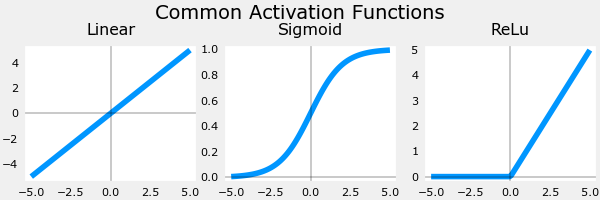

In [3]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.     
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? This enables multiple units to contribute to to the resulting function without interfering. This is examined more in the supporting optional lab. 

<a name="3"></a>
## 3 - Softmax Function
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
<center>  <img  src="./images/C2_W2_NNSoftmax.PNG" width="600" />  

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

<a name="ex01"></a>
### Exercise 1
Let's create a NumPy implementation:

In [4]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    
    a = np.exp(z) / np.sum(np.exp(z))
    
    ### END CODE HERE ### 
    return a

Below, vary the values of the `z` inputs. Note in particular how the exponential in the numerator magnifies small differences in the values. Note as well that the output values sum to one.

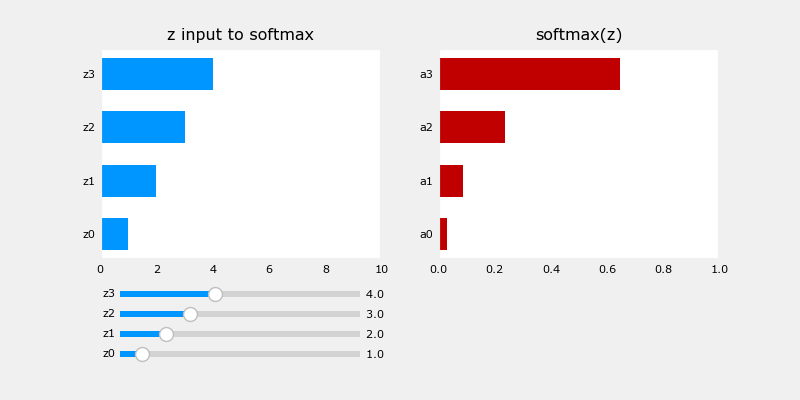

In [6]:
plt.close("all")
plt_softmax(my_softmax)

<a name="4"></a>
## 4 - Neural Networks

In last weeks assignment, you implemented a neural network to do binary classification. This week you will extend that to multiclass classification. This will utilize the softmax activation.


<a name="4.1"></a>
### 4.1 Problem Statement

In this exercise, you will use a neural network to recognize ten handwritten digits, 0-9. This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 


<a name="4.2"></a>
### 4.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [7]:
# load dataset
X, y = load_data()

#### 4.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints the first element in the variables `X` and `y`.  

In [8]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [9]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


#### 4.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [10]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 4.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

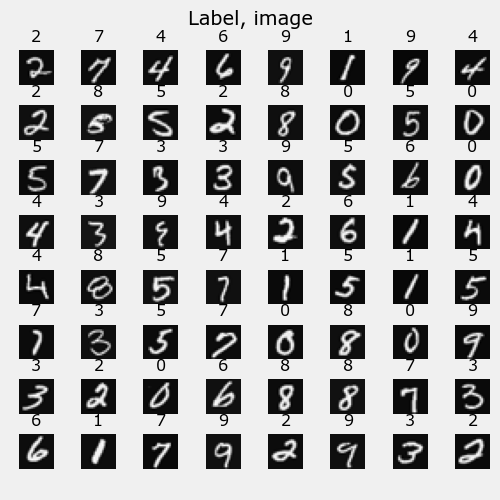

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W2_Assigment_NN.png" width="600" height="450">

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention: 
               

<a name="4.4"></a>
### 4.4 Tensorflow Model Implementation


Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

<a name="4.5"></a>
### 4.5 Softmax placement
As described in the lecture and the optional softmax lab, numerical stability is improved if the softmax is grouped with the loss function rather than the output layer during training. This has implications when *building* the model and *using* the model.  
Building:  
* The final Dense layer should use a 'linear' activation. This is effectively no activation. 
* The `model.compile` statement will indicate this by including `from_logits=True`.
`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) `  
* This does not impact the form of the target. In the case of SparseCategorialCrossentropy, the target is the expected digit, 0-9.

Using the model:
* The outputs are not probabilities. If output probabilities are desired, apply a softmax function.

<a name="ex02"></a>
### Exercise 2

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described above.

In [12]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),    #specify input shape    
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(10, activation = 'linear')
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [13]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

<details>
  <summary><font size="3" color="darkgreen"><b>Expected Output (Click to expand)</b></font></summary>
The `model.summary()` function displays a useful summary of the model. Note, the names of the layers may vary as they are auto-generated unless the name is specified.    
    
```
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 25)                10025     
_________________________________________________________________
L2 (Dense)                   (None, 15)                390       
_________________________________________________________________
L3 (Dense)                   (None, 10)                160       
=================================================================
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________
```

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [14]:
[layer1, layer2, layer3] = model.layers

In [15]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


**Expected Output**
```
W1 shape = (400, 25), b1 shape = (25,)  
W2 shape = (25, 15), b2 shape = (15,)  
W3 shape = (15, 10), b3 shape = (10,)
```

The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.

In [16]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 1.9598
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.7578
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.4432
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 0.3553
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 0.3089
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 0.2763
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.2506
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.2296
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.2117
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 0.1958
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.1823
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 0.1700
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.1591
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.1492
Epoch 15/40
157/157 ━━━━━━━━━

#### Epochs and batches
In the `fit` statement above, the number of `epochs` was set to 40. This specifies that the entire data set should be applied during training 40 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/40
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
The first line, `Epoch 1/40`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 5000 examples in our data set or roughly 157 batches. The notation on the 2nd line `157/157 [====` is describing which batch has been executed.

#### Loss  (cost)
In course 1, we learned to track the progress of gradient descent by monitoring the cost. Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as `loss`. Above, you saw the loss displayed each epoch as `model.fit` was executing. The [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) method returns a variety of metrics including the loss. This is captured in the `history` variable above. This can be used to examine the loss in a plot as shown below.

In [17]:
plot_loss_tf(history)

NameError: name 'plot_loss_tf' is not defined

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

In [ ]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

 predicting a Two: 
[[ -7.99  -2.23   0.77  -2.41 -11.66 -11.15  -9.53  -3.36  -4.42  -7.17]]
 Largest Prediction index: 2


The largest output is prediction[2], indicating the predicted digit is a '2'. If the problem only requires a selection, that is sufficient. Use NumPy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to select it. If the problem requires a probability, a softmax is required:

In [ ]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.42e-04 4.49e-02 8.98e-01 3.76e-02 3.61e-06 5.97e-06 3.03e-05 1.44e-02
  5.03e-03 3.22e-04]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [ ]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Let's look at some of the errors. 
>Note: increasing the number of training epochs can eliminate the errors on this data set.

In [ ]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

15 errors out of 5000 images


### Congratulations!
You have successfully built and utilized a neural network to do multiclass classification.

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://lh3.google.com/u/0/d/14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>